2026-01-19 22:54:16.368 | INFO     | src.data.csv_data_feed:__init__:43 - Loading CSV data from C:\Users\rdpuser\projects\trading-bot\trading-bot\data\XAGUSD._H1_2025-11-26_2025-12-26.csv
2026-01-19 22:54:16.396 | INFO     | src.data.csv_data_feed:__init__:52 - Loaded 476 rows from CSV
2026-01-19 22:54:16.397 | INFO     | src.data.csv_data_feed:__init__:53 - Date range: 2025-11-26 12:00:00 to 2025-12-26 11:00:00


symbols_list: [{'symbol': 'XAGUSD', 'csv_file': WindowsPath('C:/Users/rdpuser/projects/trading-bot/trading-bot/data/XAGUSD._H1_2025-11-26_2025-12-26.csv')}]
symbols_list: [{'symbol': 'XAGUSD', 'csv_file': WindowsPath('C:/Users/rdpuser/projects/trading-bot/trading-bot/data/XAGUSD._H1_2025-11-26_2025-12-26.csv')}]
Data Summary:
  XAGUSD:
    CSV File: C:\Users\rdpuser\projects\trading-bot\trading-bot\data\XAGUSD._H1_2025-11-26_2025-12-26.csv
    Total rows: 476
    Data range: 2025-11-26 12:00:00 to 2025-12-26 11:00:00
    Price range: 51.96400 to 75.13500

Daily data feed available: XAGUSD_DAILY
2025-11-28 15:00: PENDING  BUY(48) [XAGUSD] Entry: 53.9080100, Size: 8331, TP: 54.1000420, SL: 53.7679900, Risk: 1000.0000000 Cash: 100000
2025-12-01 01:00: CANCELLED  BUY(55) [XAGUSD] Invalidated BUY trade 291e5dda-f5d9-4106-93fd-768711958e55 due to new support 55.9029900 Cash: 100000
2025-12-02 11:00: PENDING  SELL(88) [XAGUSD] Entry: 57.0979900, Size: 6492, TP: 56.8515580, SL: 57.2720100, Ris

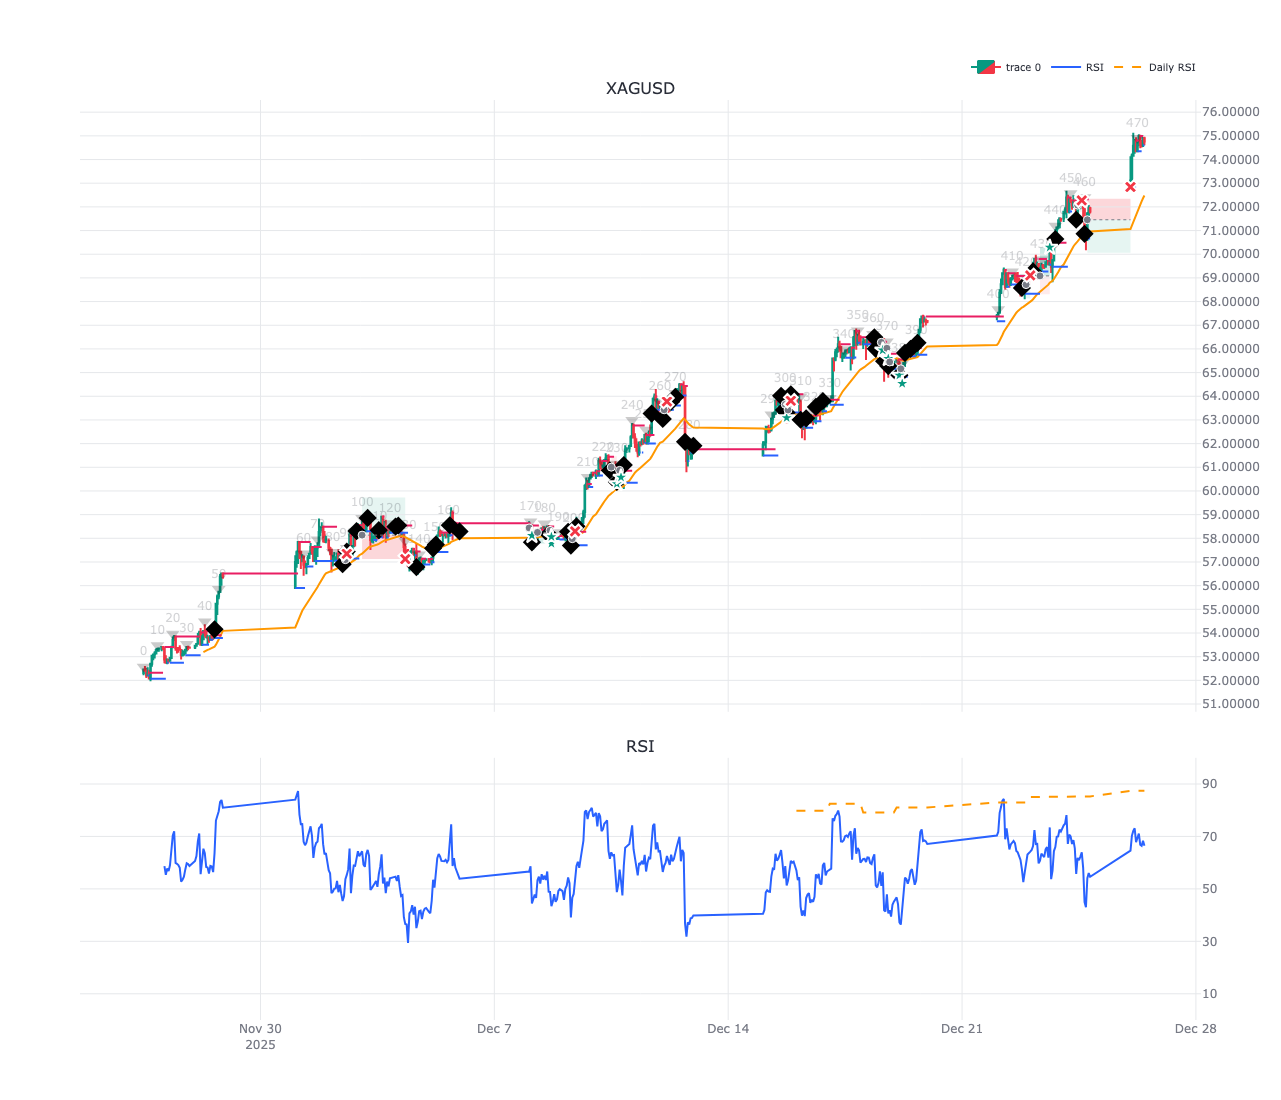

In [2]:
import pandas_ta as ta
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
# sys.stdout = open(os.devnull, 'w')
# sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '100'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'
os.environ['RR'] = '1.6'
os.environ['CHECK_FOR_DAILY_RSI'] = 'True'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = None
#symbols = ['XAGUSD', 'XAUUSD', 'EURUSD']
symbols = ['XAGUSD']
timeframe = Timeframe.H1
start_date = datetime(2025, 11, 26, 13, 10, 0)
end_date = datetime(2025, 12, 26, 13, 10, 0)
# end_date = datetime.now()



res = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles)

for symbol_index, (symbol, pair_data) in enumerate(res['data'].items()):
    plotly_plot(res['cerebro'], pair_data, symbol, symbol_index=symbol_index, height=1100)